# Problem 4 a

In [3]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
import numpy as np

from sklearn import preprocessing
import math
from sklearn import cross_validation
import matplotlib.pyplot as plt

#download the data set
X = np.loadtxt('train-features.txt')
y = np.loadtxt('train-labels.txt')

X_message = int(max(X[:,0]))
X_word_id = int(max(X[:,1]))
X_line = X.shape[0]


#build the data matrix as X_data
X_data = np.zeros((X_message,X_word_id))
i=0
for i in range(X_line): # every line of Xdata
    message_num = int(X[i][0])-1
    word_num    = int(X[i][1])-1
    word_times  = int(X[i][2])
    X_data[message_num][word_num]=word_times

#standardizing the data
X_scaled=preprocessing.scale(X_data)

# use train/test split with different random_state values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y)

# standard logistic regression
lr_model_stand = linear_model.LogisticRegression(C=math.pow(10,40))
scores_stand = model_selection.cross_val_score(lr_model_stand, X_train, y_train, cv=10, scoring='accuracy')
print(scores_stand.mean())


0.954348444748


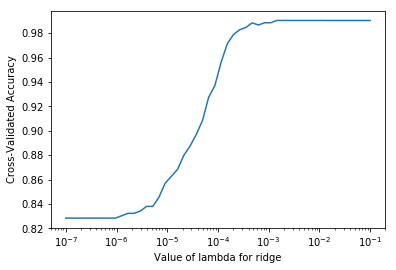

In [4]:
# 10-fold cross-validation with logistic regression in model ridge
# search for an optimal value of lambda for l2
lambda_range = np.logspace(-7, -1, 50)
lambda_scores = []
for regParam in lambda_range:
    lr_model_ridge = linear_model.LogisticRegression(C=regParam)
    scores_ridge = model_selection.cross_val_score(lr_model_ridge, X_train, y_train, cv=10, scoring='accuracy')
    lambda_scores.append(scores_ridge.mean())

# plot the value of lambda for ridge (x-axis) versus the cross-validated accuracy (y-axis)
ax = plt.gca()
ax.plot(lambda_range, lambda_scores)
ax.set_xscale('log')
plt.xlabel('Value of lambda for ridge')
plt.ylabel('Cross-Validated Accuracy')
plt.axis('tight')
plt.show()

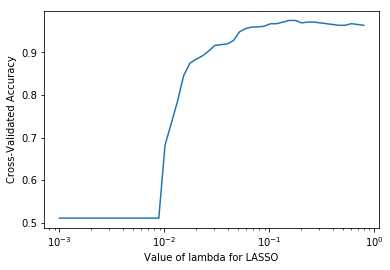

In [5]:
# 10-fold cross-validation with logistic regression in model LASSO
# search for an optimal value of lambda for l1
lambda_range = np.logspace(-3, -0.1, 50)
lambda_scores = []
for regParam in lambda_range:
    lrModel = linear_model.LogisticRegression(C=regParam,penalty='l1')
    scores = model_selection.cross_val_score(lrModel, X_train, y_train, cv=10, scoring='accuracy')
    lambda_scores.append(scores.mean())

# plot the value of lambda for ridge (x-axis) versus the cross-validated accuracy (y-axis)
ax = plt.gca()
ax.plot(lambda_range, lambda_scores)
ax.set_xscale('log')
plt.xlabel('Value of lambda for LASSO')
plt.ylabel('Cross-Validated Accuracy')
plt.axis('tight')
plt.show()

C is the inverse of regularization strength. Since standard logistic regression does not have penalty, I choose a very big C to simulate no penalty. As we can see in the two graphs, ridge can choose C=10^(-3.2),LASSO can choose C=10^(-0.9)
Next, we will use these C values in the three modles to validate the goodness, using the test set we left before.

In [6]:
#use standard model ridge model and LASSO model by the C we choose
lr_model_stand = linear_model.LogisticRegression(C=math.pow(10,40))
lr_model_stand.fit(X_train, y_train)
y_pred_stand = lr_model_stand.predict(X_test)
print('The accuracy score of standard model:',metrics.accuracy_score(y_test, y_pred_stand))

lr_model_ridge = linear_model.LogisticRegression(C=math.pow(10,-3.2))
lr_model_ridge.fit(X_train, y_train)
y_pred_ridge = lr_model_ridge.predict(X_test)
print('The accuracy score of ridge model:',metrics.accuracy_score(y_test, y_pred_ridge))

lr_model_LASSO = linear_model.LogisticRegression(C=math.pow(10,-0.9),penalty='l1')
lr_model_LASSO.fit(X_train, y_train)
y_pred_LASSO = lr_model_LASSO.predict(X_test)
print('The accuracy score of LASSO model:',metrics.accuracy_score(y_test, y_pred_LASSO))

The accuracy score of standard model: 0.954285714286
The accuracy score of ridge model: 0.971428571429
The accuracy score of LASSO model: 0.965714285714


# Problem 4 b

In [7]:
#compute the sum of each word
word_sum = X_scaled.sum(axis=0)
#convert the feature matrix by frequency
X_frequency=np.zeros((X_message,X_word_id))
for j in range(X_word_id): # every column of X_scaled
    if(word_sum[j]!=0):
        for i in range(X_message):
            X_frequency[i][j] = X_scaled[i][j]

# use train/test split with different random_state values
X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(X_frequency, y)
# standard logistic regression
lr_model_stand = linear_model.LogisticRegression(C=math.pow(10,40))
scores_stand = model_selection.cross_val_score(lr_model_stand, X_train2, y_train2, cv=10, scoring='accuracy')
print(scores_stand.mean())

0.94277512166


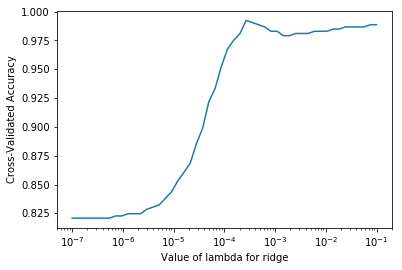

In [8]:
# 10-fold cross-validation with logistic regression in model ridge
# search for an optimal value of lambda for l2
lambda_range = np.logspace(-7, -1, 50)
lambda_scores = []
for regParam in lambda_range:
    lr_model_ridge = linear_model.LogisticRegression(C=regParam)
    scores_ridge = model_selection.cross_val_score(lr_model_ridge, X_train2, y_train2, cv=10, scoring='accuracy')
    lambda_scores.append(scores_ridge.mean())

# plot the value of lambda for ridge (x-axis) versus the cross-validated accuracy (y-axis)
ax = plt.gca()
ax.plot(lambda_range, lambda_scores)
ax.set_xscale('log')
plt.xlabel('Value of lambda for ridge')
plt.ylabel('Cross-Validated Accuracy')
plt.axis('tight')
plt.show()

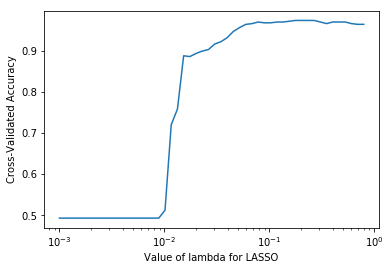

In [9]:
# 10-fold cross-validation with logistic regression in model LASSO
# search for an optimal value of lambda for l1
lambda_range = np.logspace(-3, -0.1, 50)
lambda_scores = []
for regParam in lambda_range:
    lrModel = linear_model.LogisticRegression(C=regParam,penalty='l1')
    scores = model_selection.cross_val_score(lrModel, X_train2, y_train2, cv=10, scoring='accuracy')
    lambda_scores.append(scores.mean())

# plot the value of lambda for ridge (x-axis) versus the cross-validated accuracy (y-axis)
ax = plt.gca()
ax.plot(lambda_range, lambda_scores)
ax.set_xscale('log')
plt.xlabel('Value of lambda for LASSO')
plt.ylabel('Cross-Validated Accuracy')
plt.axis('tight')
plt.show()

C is the inverse of regularization strength. Since standard logistic regression does not have penalty, I choose a very big C to simulate no penalty. As we can see in the two graphs, ridge can choose C=10^(-3.9),LASSO can choose C=10^(-0.8) Next, we will use these C values in the three modles to validate the goodness, using the test set we left before.

In [10]:
#use standard model ridge model and LASSO model by the C we choose
lr_model_stand2 = linear_model.LogisticRegression(C=math.pow(10,40))
lr_model_stand2.fit(X_train2, y_train2)
y_pred_stand2 = lr_model_stand2.predict(X_test2)
print('The accuracy score of standard model:',metrics.accuracy_score(y_test2, y_pred_stand2))

lr_model_ridge2 = linear_model.LogisticRegression(C=math.pow(10,-3.9))
lr_model_ridge2.fit(X_train2, y_train2)
y_pred_ridge2 = lr_model_ridge2.predict(X_test2)
print('The accuracy score of ridge model:',metrics.accuracy_score(y_test2, y_pred_ridge2))

lr_model_LASSO2 = linear_model.LogisticRegression(C=math.pow(10,-0.8),penalty='l1')
lr_model_LASSO2.fit(X_train2, y_train2)
y_pred_LASSO2 = lr_model_LASSO2.predict(X_test2)
print('The accuracy score of LASSO model:',metrics.accuracy_score(y_test2, y_pred_LASSO2))

The accuracy score of standard model: 0.96
The accuracy score of ridge model: 0.977142857143
The accuracy score of LASSO model: 0.977142857143


# Problem 4 c

In [11]:
#convert the feature matrix by log function
X_log=np.zeros((X_message,X_word_id))
for i in range(X_word_id): # every column of X_scaled
    for j in range(X_message):
        X_log[j][i] = math.log(X_frequency[j][i] + 1)

# use train/test split with different random_state values
X_train3, X_test3, y_train3, y_test3 = model_selection.train_test_split(X_log, y)
# standard logistic regression
lr_model_stand = linear_model.LogisticRegression(C=math.pow(10,40))
scores_stand = model_selection.cross_val_score(lr_model_stand, X_train3, y_train3, cv=10, scoring='accuracy')
print(scores_stand.mean())

0.982872386174


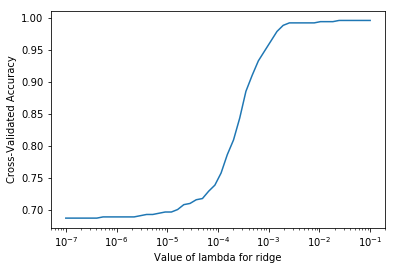

In [12]:
# 10-fold cross-validation with logistic regression in model ridge
# search for an optimal value of lambda for l2
lambda_range = np.logspace(-7, -1, 50)
lambda_scores = []
for regParam in lambda_range:
    lr_model_ridge = linear_model.LogisticRegression(C=regParam)
    scores_ridge = model_selection.cross_val_score(lr_model_ridge, X_train3, y_train3, cv=10, scoring='accuracy')
    lambda_scores.append(scores_ridge.mean())

# plot the value of lambda for ridge (x-axis) versus the cross-validated accuracy (y-axis)
ax = plt.gca()
ax.plot(lambda_range, lambda_scores)
ax.set_xscale('log')
plt.xlabel('Value of lambda for ridge')
plt.ylabel('Cross-Validated Accuracy')
plt.axis('tight')
plt.show()

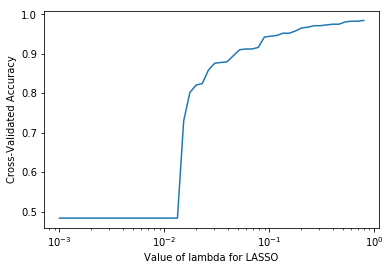

In [13]:
# 10-fold cross-validation with logistic regression in model LASSO
# search for an optimal value of lambda for l1
lambda_range = np.logspace(-3, -0.1, 50)
lambda_scores = []
for regParam in lambda_range:
    lrModel = linear_model.LogisticRegression(C=regParam,penalty='l1')
    scores = model_selection.cross_val_score(lrModel, X_train3, y_train3, cv=10, scoring='accuracy')
    lambda_scores.append(scores.mean())

# plot the value of lambda for ridge (x-axis) versus the cross-validated accuracy (y-axis)
ax = plt.gca()
ax.plot(lambda_range, lambda_scores)
ax.set_xscale('log')
plt.xlabel('Value of lambda for LASSO')
plt.ylabel('Cross-Validated Accuracy')
plt.axis('tight')
plt.show()

C is the inverse of regularization strength. Since standard logistic regression does not have penalty, I choose a very big C to simulate no penalty. As we can see in the two graphs, ridge can choose C=10^(-1.9),LASSO can choose C=10^(-0.1) Next, we will use these C values in the three modles to validate the goodness, using the test set we left before.

In [14]:
#use standard model ridge model and LASSO model by the C we choose
lr_model_stand3 = linear_model.LogisticRegression(C=math.pow(10,40))
lr_model_stand3.fit(X_train3, y_train3)
y_pred_stand3 = lr_model_stand3.predict(X_test3)
print('The accuracy score of standard model:',metrics.accuracy_score(y_test3, y_pred_stand3))

lr_model_ridge3 = linear_model.LogisticRegression(C=math.pow(10,-1.9))
lr_model_ridge3.fit(X_train3, y_train3)
y_pred_ridge3 = lr_model_ridge3.predict(X_test3)
print('The accuracy score of ridge model:',metrics.accuracy_score(y_test3, y_pred_ridge3))

lr_model_LASSO3 = linear_model.LogisticRegression(C=math.pow(10,-0.1),penalty='l1')
lr_model_LASSO3.fit(X_train3, y_train3)
y_pred_LASSO3 = lr_model_LASSO3.predict(X_test3)
print('The accuracy score of LASSO model:',metrics.accuracy_score(y_test3, y_pred_LASSO3))

The accuracy score of standard model: 0.977142857143
The accuracy score of ridge model: 0.982857142857
The accuracy score of LASSO model: 0.977142857143


# Problem 4 d

In [15]:
print('In problem a:')

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_stand)
AUCtrain11 = metrics.auc(fpr, tpr)
print('The AUC of standard model on the training set is:',AUCtrain11)
#compute the classification error
i=0
class_error = 0
for i in range(len(y_test)):
    if(y_test[i]!=y_pred_stand[i]):
        class_error=class_error+1
Pclass_error11 = class_error/len(y_test)
print('and the standard model classification error rate is:',Pclass_error11)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ridge)
AUCtrain12 = metrics.auc(fpr, tpr)
print('The AUC of ridge model on the training set is:',AUCtrain12)
#compute the classification error
i=0
class_error = 0
for i in range(len(y_test)):
    if(y_test[i]!=y_pred_ridge[i]):
        class_error=class_error+1
Pclass_error12 = class_error/len(y_test)
print('and the ridge model classification error rate is:',Pclass_error12)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_LASSO)
AUCtrain13 = metrics.auc(fpr, tpr)
print('The AUC of LASSO model on the training set is:',AUCtrain13)
#compute the classification error
i=0
class_error = 0
for i in range(len(y_test)):
    if(y_test[i]!=y_pred_LASSO[i]):
        class_error=class_error+1
Pclass_error13 = class_error/len(y_test)
print('and the LASSO model classification error rate is:',Pclass_error13)

In problem a:
The AUC of standard model on the training set is: 0.953383162864
and the standard model classification error rate is: 0.045714285714285714
The AUC of ridge model on the training set is: 0.970954628901
and the ridge model classification error rate is: 0.02857142857142857
The AUC of LASSO model on the training set is: 0.964857067926
and the LASSO model classification error rate is: 0.03428571428571429


In [17]:
print('In problem b:')

fpr, tpr, thresholds = metrics.roc_curve(y_test2, y_pred_stand2)
AUCtrain21 = metrics.auc(fpr, tpr)
print('The AUC of standard model on the training set is:',AUCtrain21)
#compute the classification error
i=0
class_error = 0
for i in range(len(y_test2)):
    if(y_test2[i]!=y_pred_stand2[i]):
        class_error=class_error+1
Pclass_error21 = class_error/len(y_test2)
print('and the standard model classification error rate is:',Pclass_error21)

fpr, tpr, thresholds = metrics.roc_curve(y_test2, y_pred_ridge2)
AUCtrain22 = metrics.auc(fpr, tpr)
print('The AUC of ridge model on the training set is:',AUCtrain22)
#compute the classification error
i=0
class_error = 0
for i in range(len(y_test2)):
    if(y_test2[i]!=y_pred_ridge2[i]):
        class_error=class_error+1
Pclass_error22 = class_error/len(y_test2)
print('and the ridge model classification error rate is:',Pclass_error22)

fpr, tpr, thresholds = metrics.roc_curve(y_test2, y_pred_LASSO2)
AUCtrain23 = metrics.auc(fpr, tpr)
print('The AUC of LASSO model on the training set is:',AUCtrain23)
#compute the classification error
i=0
class_error = 0
for i in range(len(y_test2)):
    if(y_test2[i]!=y_pred_LASSO2[i]):
        class_error=class_error+1
Pclass_error23 = class_error/len(y_test2)
print('and the LASSO model classification error rate is:',Pclass_error23)

In problem b:
The AUC of standard model on the training set is: 0.960164835165
and the standard model classification error rate is: 0.04
The AUC of ridge model on the training set is: 0.97619047619
and the ridge model classification error rate is: 0.022857142857142857
The AUC of LASSO model on the training set is: 0.976648351648
and the LASSO model classification error rate is: 0.022857142857142857


In [18]:
print('In problem b:')

fpr, tpr, thresholds = metrics.roc_curve(y_test3, y_pred_stand3)
AUCtrain31 = metrics.auc(fpr, tpr)
print('The AUC of standard model on the training set is:',AUCtrain31)
#compute the classification error
i=0
class_error = 0
for i in range(len(y_test3)):
    if(y_test3[i]!=y_pred_stand3[i]):
        class_error=class_error+1
Pclass_error31 = class_error/len(y_test3)
print('and the standard model classification error rate is:',Pclass_error31)

fpr, tpr, thresholds = metrics.roc_curve(y_test3, y_pred_ridge3)
AUCtrain32 = metrics.auc(fpr, tpr)
print('The AUC of ridge model on the training set is:',AUCtrain32)
#compute the classification error
i=0
class_error = 0
for i in range(len(y_test3)):
    if(y_test3[i]!=y_pred_ridge3[i]):
        class_error=class_error+1
Pclass_error32 = class_error/len(y_test3)
print('and the ridge model classification error rate is:',Pclass_error32)

fpr, tpr, thresholds = metrics.roc_curve(y_test3, y_pred_LASSO3)
AUCtrain33 = metrics.auc(fpr, tpr)
print('The AUC of LASSO model on the training set is:',AUCtrain33)
#compute the classification error
i=0
class_error = 0
for i in range(len(y_test3)):
    if(y_test3[i]!=y_pred_LASSO3[i]):
        class_error=class_error+1
Pclass_error33 = class_error/len(y_test3)
print('and the LASSO model classification error rate is:',Pclass_error33)

In problem b:
The AUC of standard model on the training set is: 0.978045886076
and the standard model classification error rate is: 0.022857142857142857
The AUC of ridge model on the training set is: 0.982133438819
and the ridge model classification error rate is: 0.017142857142857144
The AUC of LASSO model on the training set is: 0.979166666667
and the LASSO model classification error rate is: 0.022857142857142857


Generally, models in question c have the highest AUC and the lowest classification error. The differences come from the pre-processing. According to the AUC and classification error,I can choose the best model in each question. In question a, the ridge logistic regression is the best model. In question b,LASSO is the best model. In question c,ridge and LASSO are a little better than the standard.

In [19]:
import pandas as pd

AUC_table=[('regulation',['a','b','c']),
           ('AUC-standard',[AUCtrain11,AUCtrain21,AUCtrain31]),
           ('error-standard',[Pclass_error11,Pclass_error21,Pclass_error31]),
           ('AUC-ridge',[AUCtrain12,AUCtrain22,AUCtrain33]),
           ('error-ridge',[Pclass_error12,Pclass_error22,Pclass_error32]),
           ( 'AUC-LASSO',[AUCtrain13,AUCtrain23,AUCtrain33]),
           ('error-LASSO',[Pclass_error13,Pclass_error23,Pclass_error33]),]
pd.DataFrame.from_items(AUC_table)

,regulation,AUC-standard,error-standard,AUC-ridge,error-ridge,AUC-LASSO,error-LASSO
0,a,0.953383,0.045714,0.970955,0.028571,0.964857,0.034286
1,b,0.960165,0.040000,0.976190,0.022857,0.976648,0.022857
2,c,0.978046,0.022857,0.979167,0.017143,0.979167,0.022857
